In [0]:
from google.colab import drive  


In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import math
import sympy as sy
from sympy import *
import pandas as pd
import cv2


In [2]:
import os
os.chdir(r'C:\Users\Kfor\Desktop\亚太\2019 APMCM Problems\2019 APMCM Problems\OriginResult')

os.environ['CUDA_VISIBLE_DEVICES']='1'  

In [10]:
#二氧化硅折射率
n = 1.548745
for oneImage in ['0505.bmp']:
    imageTest = cv2.imread(oneImage,0)

    [rows, cols] = np.shape(imageTest)
    # 能框住检测到的二氧化硅区域的最小矩形的四个边框的位置信息
    leftBorder = 0
    rightBorder = cols
    upBorder = 0
    downBorder = rows
    
    imageTestSorted = np.sort(imageTest,axis=None)[:,np.newaxis]
    imageTestSorted.astype(np.int)
    imageTestSorted = np.delete(imageTestSorted,np.where(imageTestSorted==0))[:,np.newaxis]
    imageTestLeft1 = np.concatenate([imageTestSorted[1:],[[np.max(imageTest)]]])
    
    # 最小灰度值，代表与CCD(相机)平行,由于边框扣取存在一定误差，可能会将二氧化硅f附近影子也包括进去，对像素点灰度进行排序取存在较大断崖式的地方最为sio2的灰度最低点
    imageTestDif = imageTestSorted - imageTestLeft1
#     if imageTestDif[imageTestDif > 100].any():
#         # mingrey_pos = np.index(np.max(imageTestDif))
#         mingrey_pos = np.unravel_index(np.argmax(imageTestDif), imageTestDif.shape)
#         min_grey = imageTestSorted[mingrey_pos[0], mingrey_pos[1]]
#         [mingrey_pos_x, mingrey_pos_y] = np.unravel_index(
#             min_grey, imageTest.shape)
    if np.min(imageTest) > 100:
        min_grey = np.min(imageTest)
    else:
        min_grey = 100
    # min_grey = np.min(imageTest)
    # [mingrey_pos_x,mingrey_pos_y] = np.unravel_index(np.argmax(imageTest),imageTest.shape)
    # 最大反射光强
    
#     [mingrey_pos_x, mingrey_pos_y]  = np.unravel_index(np.argmax(imageTest), imageTest.shape)
#     min_grey = imageTestSorted[mingrey_pos[0], mingrey_pos[1]]
#     [mingrey_pos_x, mingrey_pos_y] = np.unravel_index(
#         min_grey, imageTest.shape)
    max_I = np.argmax(imageTest)*math.pow(n+1, 2)/math.pow(n-1, 2)

    # 用于存储物体高度的一个矩阵，将最高点定义为0，其余点均为负数
    thickness = np.zeros([rows, cols])
    thickness[mingrey_pos_x, mingrey_pos_y] = 0
    
    
    rou = imageTest / max_I

    x = sy.symbols('xi_ta')
    y = sy.symbols('rou')
    # expr = -1.061*x**5-3.3437*x**4+4.1582*x**3-2.38295*x**2+0.57975*x+0.0083-y

    # 对最小灰度值的点（即高度最高的点）左上部分根据灰度值求得高度变化的斜率从而计算坐上部分的高度
    for i in np.arange(upBorder+1, mingrey_pos_y)[::-1]:
        for j in np.arange(leftBorder+1, mingrey_pos_x)[::-1]:
            if(imageTest[i, j] != 0):
                expr = "0.03175*x**2-0.01495*x+0.0476-"+str(imageTest[i, j]/max_I)
                expr = sympify(expr)
                dhdx = sy.solve(expr)[1]
                if np.complex(dhdx):
                    thickness[i, j] = -255
                else:
                    thickness[i, j] = thickness[i, j+1] - dhdx
        if(i > upBorder+1 and imageTest[i-1, mingrey_pos_y] != 0):
            expr = "0.03175*x**2-0.01495*x+0.0476-" + \
                str(imageTest[i-1, mingrey_pos_y])
            expr = sympify(expr)
            dhdx = sy.solve(expr)[1]
            if np.iscomplex(dhdx):
                thickness[i-1, mingrey_pos_y] = -255
            else:
                thickness[i-1, mingrey_pos_y] = thickness[i, mingrey_pos_y] - dhdx
    # 对最小灰度值的点（即高度最高的点）右上部分根据灰度值求得高度变化的斜率从而计算坐上部分的高度
    for i in np.arange(upBorder+1, mingrey_pos_y)[::-1]:
        for j in np.arange(mingrey_pos_x+1, rightBorder):
            if(imageTest[i, j] != 0):
                expr = "0.03175*x**2-0.01495*x+0.0476-"+str(imageTest[i, j]/max_I)
                expr = sympify(expr)
                dhdx = sy.solve(expr)[1]
                if np.iscomplex(dhdx):
                    thickness[i, j] = -255
                else:
                    thickness[i, j] = thickness[i, j-1] - dhdx
                print(thickness[i, j])
        if(i > upBorder+1 and imageTest[i-1, mingrey_pos_y] != 0):
            expr = "0.03175*x**2-0.01495*x+0.0476-" + \
                str(imageTest[i-1, mingrey_pos_y])
            expr = sympify(expr)
            dhdx = sy.solve(expr)[1]
            if np.iscomplex(dhdx):
                thickness[i-1, mingrey_pos_y] = -255
            else:
                thickness[i-1, mingrey_pos_y] = thickness[i, mingrey_pos_y] - dhdx
            print(thickness[i-1, mingrey_pos_y])
    # 对最小灰度值的点（即高度最高的点）左下部分根据灰度值求得高度变化的斜率从而计算坐上部分的高度
    for i in np.arange(mingrey_pos_y+1, downBorder):
        for j in np.arange(leftBorder+1, mingrey_pos_x)[::-1]:
            if(imageTest[i, j] != 0):
                expr = "0.03175*x**2-0.01495*x+0.0476-"+str(imageTest[i, j]/max_I)
                expr = sympify(expr)
                dhdx = sy.solve(expr)[1]
                if np.iscomplex(dhdx):
                    thickness[i, j] = -255
                else:
                    thickness[i, j] = thickness[i, j+1] - dhdx
                print(thickness[i, j])
        if(i > downBorder-1 and imageTest[i+1, mingrey_pos_y] != 0):
            expr = "0.03175*x**2-0.01495*x+0.0476-" + \
                str(imageTest[i-1, mingrey_pos_y]/max_I)
            expr = sympify(expr)
            dhdx = sy.solve(expr)[1]
            if np.iscomplex(dhdx):
                thickness[i+1, mingrey_pos_y] = -255
            else:
                thickness[i+1, mingrey_pos_y] = thickness[i, mingrey_pos_y] - dhdx
            print(thickness[i-1, mingrey_pos_y])
    # 对最小灰度值的点（即高度最高的点）右下部分根据灰度值求得高度变化的斜率从而计算坐上部分的高度
    for i in np.arange(mingrey_pos_y+1, downBorder):
        for j in np.arange(mingrey_pos_x+1, rightBorder):
            if(imageTest[i, j] != 0):
                expr = "0.03175*x**2-0.01495*x+0.0476-"+str(imageTest[i, j]/max_I)
                expr = sympify(expr)
                dhdx = sy.solve(expr)[1]
                if np.iscomplex(dhdx):
                    thickness[i, j] = -255
                else:
                    thickness[i, j] = thickness[i, j-1] - dhdx
                print(thickness[i, j])
        if(i > downBorder-1 and imageTest[i+1, mingrey_pos_y] != 0):
            expr = "0.03175*x**2-0.01495*x+0.0476-" + \
                str(imageTest[i-1, mingrey_pos_y]/max_I)
            expr = sympify(expr)
            dhdx = sy.solve(expr)[1]
            if np.iscomplex(dhdx):
                thickness[i+1, mingrey_pos_y] = -255
            else:
                thickness[i+1, mingrey_pos_y] = thickness[i, mingrey_pos_y] - dhdx
            print(thickness[i-1, mingrey_pos_y])
    thickness_mat = pd.DataFrame(thickness)
    thickness_mat.to_excel("../3dModel/"+oneImage+".xlsx", index=False)
    # print(thickness)

-329.46728095137144
-403.93456190274287
-478.4018428541143
-553.292211232291
-627.7594921836625
-701.8012604417619
-776.2685413931333
-850.3103096512327
-924.7775906026042
-999.6679589807809
-1074.1352399321524
-1148.1770081902519
-1221.5758674028307
-1294.9747266154095
-1369.442007566781
-1443.9092885181526
-1518.3765694695242
-1593.266937847701
-1668.1573062258778
-1738.925952529152
-1811.4587069392305
-1885.925987890602
-1960.3932688419736
-2034.435037100073
-2108.9023180514446


TypeError: can't convert complex to float

In [9]:
thickness.shape

(994, 1095)

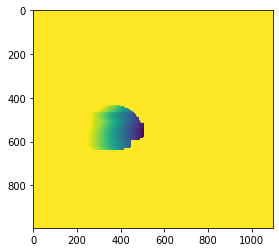

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(thickness)


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage as ndi
from skimage.feature import shape_index
from skimage.draw import circle




In [0]:
#假设得到了二值图，利用二值图做mask到原图上
#原图内只有晶体块的区域内有灰度值
#1.找一个最高的灰度值，该像素点对应这是一个平面，对应灰度值为Imax

# 对应保存的三维数据的表格的文件名，取文件夹中遍历得到的图片的文件名来给表格命名
filename = "filename"+".excel"

#二氧化硅折射率
n = 1.548745

imageTest = cv2.imread("/content/drive/My Drive/sio2_1.png",0)
# 获取图片的长宽
[rows, cols] = np.shape(imageTest)
# 能框住检测到的二氧化硅区域的最小矩形的四个边框的位置信息
leftBorder = 0
rightBorder = cols
upBorder = 0
downBorder = rows




In [0]:
#最小灰度值，代表与CCD(相机)平行,由于边框扣取存在一定误差，可能会将二氧化硅f附近影子也包括进去，对像素点灰度进行排序取存在较大断崖式的地方最为sio2的灰度最低点
imageTestSorted = np.sort(imageTest,axis=None)[:,np.newaxis]
imageTestSorted.astype(np.int)
imageTestSorted = np.delete(imageTestSorted,np.where(imageTestSorted==0))[:,np.newaxis]
imageTestLeft1 = np.concatenate([imageTestSorted[1:],[[np.max(imageTest)]]])
# print(imageTestLeft1.shape)
# imageTestSorted = np.asarray(imageTestSorted)
# print(imageTestSorted[:,np.newaxis].dtype)
# imageTestLeft1 = np.array(imageTestSorted[1:],np.ones((1,1),dtype=np.int)*np.max(imageTest))
# imageTestLeft1 = np.array(imageTestSorted[1:],np.array([np.max(imageTest)]))
# imageTestLeft1 = np.ndarray(imageTestSorted[1:],np.max(imageTest))

In [0]:
# 最小灰度值，代表与CCD(相机)平行,由于边框扣取存在一定误差，可能会将二氧化硅f附近影子也包括进去，对像素点灰度进行排序取存在较大断崖式的地方最为sio2的灰度最低点
imageTestDif = imageTestSorted - imageTestLeft1
if imageTestDif[imageTestDif > 100].any():
    # mingrey_pos = np.index(np.max(imageTestDif))
    mingrey_pos = np.unravel_index(np.argmax(imageTestDif), imageTestDif.shape)
    min_grey = imageTestSorted[mingrey_pos[0], mingrey_pos[1]]
    [mingrey_pos_x, mingrey_pos_y] = np.unravel_index(
        min_grey, imageTest.shape)
elif np.min(imageTest) > 15:
    min_grey = np.min(imageTest)
else:
    min_grey = 15
# min_grey = np.min(imageTest)
# [mingrey_pos_x,mingrey_pos_y] = np.unravel_index(np.argmax(imageTest),imageTest.shape)
# 最大反射光强
max_I = min_grey*math.pow(n+1, 2)/math.pow(n-1, 2)

# 用于存储物体高度的一个矩阵，将最高点定义为0，其余点均为负数
thickness = np.zeros([rows, cols])
thickness[mingrey_pos_x, mingrey_pos_y] = 0

In [0]:
rou = imageTest / max_I

x = sy.symbols('xi_ta')
y = sy.symbols('rou')
# expr = -1.061*x**5-3.3437*x**4+4.1582*x**3-2.38295*x**2+0.57975*x+0.0083-y

# 对最小灰度值的点（即高度最高的点）左上部分根据灰度值求得高度变化的斜率从而计算坐上部分的高度
for i in np.arange(upBorder+1, mingrey_pos_y)[::-1]:
    for j in np.arange(leftBorder+1, mingrey_pos_x)[::-1]:
        if(imageTest[i, j] != 0):
            expr = "0.03175*x**2-0.01495*x+0.0476-"+str(imageTest[i, j]/max_I)
            expr = sympify(expr)
            dhdx = sy.solve(expr)[1]
            if np.complex(dhdx):
                thickness[i, j] = -255
            else:
                thickness[i, j] = thickness[i, j+1] - dhdx
    if(i > upBorder+1 and imageTest[i-1, mingrey_pos_y] != 0):
        expr = "0.03175*x**2-0.01495*x+0.0476-" + \
            str(imageTest[i-1, mingrey_pos_y])
        expr = sympify(expr)
        dhdx = sy.solve(expr)[1]
        if np.iscomplex(dhdx):
            thickness[i-1, mingrey_pos_y] = -255
        else:
            thickness[i-1, mingrey_pos_y] = thickness[i, mingrey_pos_y] - dhdx
# 对最小灰度值的点（即高度最高的点）右上部分根据灰度值求得高度变化的斜率从而计算坐上部分的高度
for i in np.arange(upBorder+1, mingrey_pos_y)[::-1]:
    for j in np.arange(mingrey_pos_x+1, rightBorder):
        if(imageTest[i, j] != 0):
            expr = "0.03175*x**2-0.01495*x+0.0476-"+str(imageTest[i, j]/max_I)
            expr = sympify(expr)
            dhdx = sy.solve(expr)[1]
            if np.iscomplex(dhdx):
                thickness[i, j] = -255
            else:
                thickness[i, j] = thickness[i, j-1] - dhdx
            print(thickness[i, j])
    if(i > upBorder+1 and imageTest[i-1, mingrey_pos_y] != 0):
        expr = "0.03175*x**2-0.01495*x+0.0476-" + \
            str(imageTest[i-1, mingrey_pos_y])
        expr = sympify(expr)
        dhdx = sy.solve(expr)[1]
        if np.iscomplex(dhdx):
            thickness[i-1, mingrey_pos_y] = -255
        else:
            thickness[i-1, mingrey_pos_y] = thickness[i, mingrey_pos_y] - dhdx
        print(thickness[i-1, mingrey_pos_y])
# 对最小灰度值的点（即高度最高的点）左下部分根据灰度值求得高度变化的斜率从而计算坐上部分的高度
for i in np.arange(mingrey_pos_y+1, downBorder):
    for j in np.arange(leftBorder+1, mingrey_pos_x)[::-1]:
        if(imageTest[i, j] != 0):
            expr = "0.03175*x**2-0.01495*x+0.0476-"+str(imageTest[i, j]/max_I)
            expr = sympify(expr)
            dhdx = sy.solve(expr)[1]
            if np.iscomplex(dhdx):
                thickness[i, j] = -255
            else:
                thickness[i, j] = thickness[i, j+1] - dhdx
            print(thickness[i, j])
    if(i > downBorder-1 and imageTest[i+1, mingrey_pos_y] != 0):
        expr = "0.03175*x**2-0.01495*x+0.0476-" + \
            str(imageTest[i-1, mingrey_pos_y]/max_I)
        expr = sympify(expr)
        dhdx = sy.solve(expr)[1]
        if np.iscomplex(dhdx):
            thickness[i+1, mingrey_pos_y] = -255
        else:
            thickness[i+1, mingrey_pos_y] = thickness[i, mingrey_pos_y] - dhdx
        print(thickness[i-1, mingrey_pos_y])
# 对最小灰度值的点（即高度最高的点）右下部分根据灰度值求得高度变化的斜率从而计算坐上部分的高度
for i in np.arange(mingrey_pos_y+1, downBorder):
    for j in np.arange(mingrey_pos_x+1, rightBorder):
        if(imageTest[i, j] != 0):
            expr = "0.03175*x**2-0.01495*x+0.0476-"+str(imageTest[i, j]/max_I)
            expr = sympify(expr)
            dhdx = sy.solve(expr)[1]
            if np.iscomplex(dhdx):
                thickness[i, j] = -255
            else:
                thickness[i, j] = thickness[i, j-1] - dhdx
            print(thickness[i, j])
    if(i > downBorder-1 and imageTest[i+1, mingrey_pos_y] != 0):
        expr = "0.03175*x**2-0.01495*x+0.0476-" + \
            str(imageTest[i-1, mingrey_pos_y]/max_I)
        expr = sympify(expr)
        dhdx = sy.solve(expr)[1]
        if np.iscomplex(dhdx):
            thickness[i+1, mingrey_pos_y] = -255
        else:
            thickness[i+1, mingrey_pos_y] = thickness[i, mingrey_pos_y] - dhdx
        print(thickness[i-1, mingrey_pos_y])
thickness_mat = pd.DataFrame(thickness)
thickness_mat.to_excel("./3dModel/"+filename, index=False)
# print(thickness)

# expr.sub(y,1)

# res = sy.solve([expr],[x])
# print(sy.solve(expr))

-0.3626672770488018
-6.877864964090532
-10.312672257950538
-0.3626672770488018
-0.3626672770488018
-1.4504067142072632
-3.3993547003292557
-5.731477012736674
-8.386843592273166
-10.718965904680584
-12.667913890802577
-14.61686187692457
-16.565809863046564
-16.928477140095367
-17.29114441714417
-17.653811694192974
-18.016478971241778
-18.37914624829058
-18.741813525339385
-20.19222023954665
-20.554887516595453
-20.917554793644257
-21.28022207069306
-21.642889347741864
-22.005556624790668
-22.36822390183947
-22.730891178888275
-23.093558455937078
-23.45622573298588
-23.818893010034685
-24.18156028708349
-24.544227564132292
-24.906894841181096
-25.2695621182299
-25.632229395278703
-25.994896672327506
-26.35756394937631
-26.720231226425113
-27.082898503473917
-27.44556578052272
-27.808233057571524
-28.170900334620327
-28.53356761166913
-28.896234888717935
-29.258902165766738
-29.62156944281554
-29.984236719864345
-30.34690399691315
-30.709571273961952
-31.072238551010756
-31.43490582805956

In [0]:
# expr = 0.03175*x**2-0.01495*x+0.0476-178/5/2.548745**2*0.548745**2
# print(sy.solve(expr)[1])